In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

plt.style.use('seaborn-v0_8-whitegrid')

In [21]:
try:
    df = pd.read_csv('data/score_updated.csv')
    print("Dataset 'score_updated.csv' loaded successfully.")
except FileNotFoundError:
    print("Dataset 'score_updated.csv' not found. Please ensure the file is in the correct directory.")


Dataset 'score_updated.csv' loaded successfully.


In [22]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   96 non-null     float64
 1   Scores  96 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 1.6 KB


In [24]:
df.describe()

,Hours,Scores
count,96.000000,96.000000
mean,5.267708,54.020833
std,2.503030,25.017459
min,1.000000,12.000000
25%,3.075000,30.750000
50%,5.250000,54.500000
75%,7.325000,74.250000
max,9.800000,99.000000


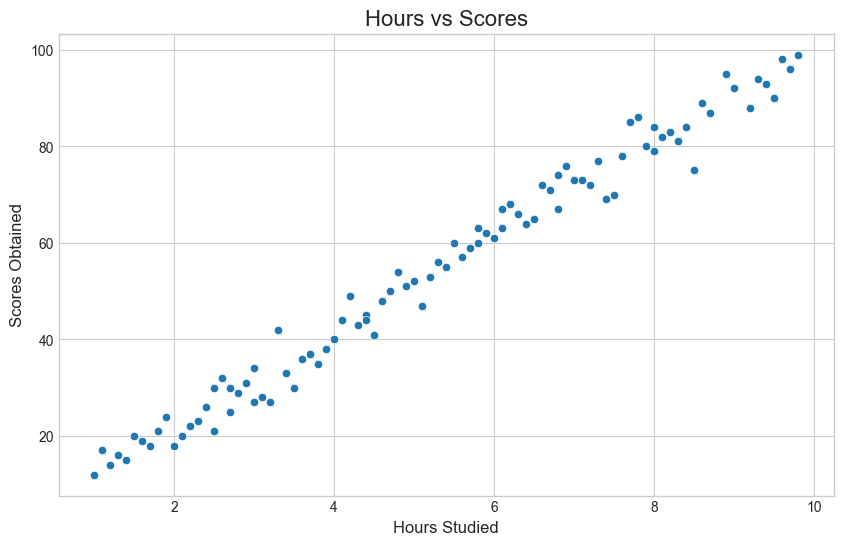

In [25]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Hours', y='Scores', data=df)

plt.title('Hours vs Scores', fontsize=16)
plt.xlabel('Hours Studied', fontsize=12)
plt.ylabel('Scores Obtained', fontsize=12)
plt.show()

In [26]:
X = df[['Hours']]
y = df['Scores']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [28]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (76, 1)
Shape of X_test: (20, 1)
Shape of y_train: (76,)
Shape of y_test: (20,)


In [29]:
model = LinearRegression()

In [30]:
model.fit(X_train, y_train)
print("Model training complete.")

Model training complete.


In [33]:
intercept = model.intercept_
coefficient = model.coef_[0]
print(f"Intercept: {intercept:.3f}")
print(f"Coefficients: {coefficient:.3f}")
print(f"Interpretation: For each additional hour studied, the score is predicted to increase by {coefficient:.2f} points.")


Intercept: 2.441
Coefficients: 9.836
Interpretation: For each additional hour studied, the score is predicted to increase by 9.84 points.


In [34]:
y_pred = model.predict(X_test)

In [35]:
results_df = pd.DataFrame({'Actual Score': y_test, 'Predicted Score': y_pred})
print("\nComparison of Actual and Predicted Scores:")
print(results_df)


Comparison of Actual and Predicted Scores:
    Actual Score  Predicted Score
80            32        28.013217
77            51        50.635177
73            27        31.947471
94            37        38.832415
33            82        82.109210
79            89        87.027027
69            70        76.207829
42            71        68.339321
0             21        27.029653
10            85        78.174956
64            55        55.552995
30            19        18.177582
18            67        62.437940
4             30        36.865288
31            92        90.961281
26            90        95.879099
12            41        46.700923
22            35        39.815979
53            36        37.848852
85            52        51.618741


In [36]:
mae = metrics.mean_absolute_error(y_test, y_pred)
r2  = metrics.r2_score(y_test, y_pred)

print(f"\nMean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2 Score): {r2:.2f}")
print(f"Interpretation: {r2:.2%} of the variance in scores can be explained by the hours studied.")


Mean Absolute Error (MAE): 3.37
R-squared (R2 Score): 0.97
Interpretation: 97.09% of the variance in scores can be explained by the hours studied.


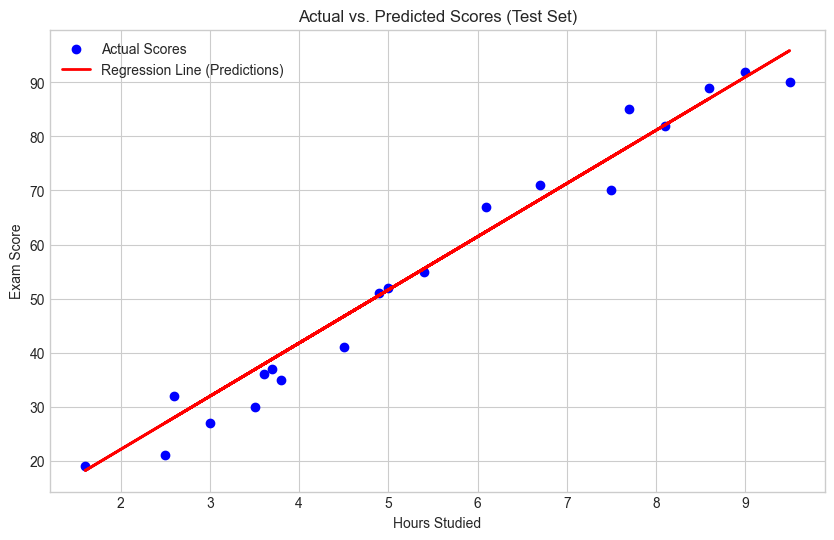

In [37]:
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color='blue', label='Actual Scores')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line (Predictions)')
plt.title('Actual vs. Predicted Scores (Test Set)')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.legend()
plt.show()

In [38]:
hours_studied = 9.25
predicted_score = model.predict([[hours_studied]]) # Must be a 2D array

print(f"\nPredicted score for a student who studied {hours_studied} hours: {predicted_score[0]:.2f}")


Predicted score for a student who studied 9.25 hours: 93.42


c:\Users\DOWNLOAD\.virtualenvs\p\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
